<a href="https://colab.research.google.com/github/nahariaprateek/PyCaret/blob/main/PyCaret_Prateek_BA810_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diamond Prices

#Exploratory Data Analysis

## Loading and Reading the Data

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from plotly.offline import init_notebook_mode, iplot
url = 'https://raw.githubusercontent.com/nahariaprateek/Diamond-Price-Prediction/main/diamonds.csv'
data = pd.read_csv(url)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#creating copy of the raw dataset
df = data.copy()

In [ ]:
#dropping the 'Unnamed:0' column as it was only showing the index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()
#There are 0 values in dimensions (x,y,z). Analyzing them further

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
cat_var = (df.dtypes =="object")
object_cols = list(cat_var[cat_var].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
rows_duplicates = df[df.duplicated()].shape[0]
rows_duplicates

146

In [ ]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

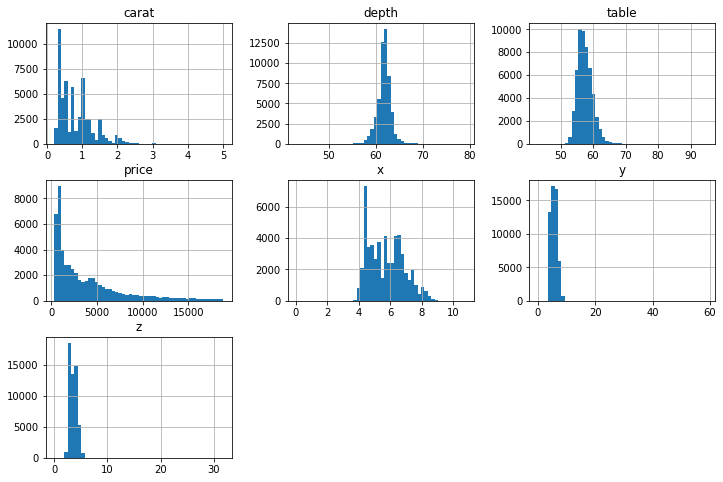

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12, 8))
plt.show()

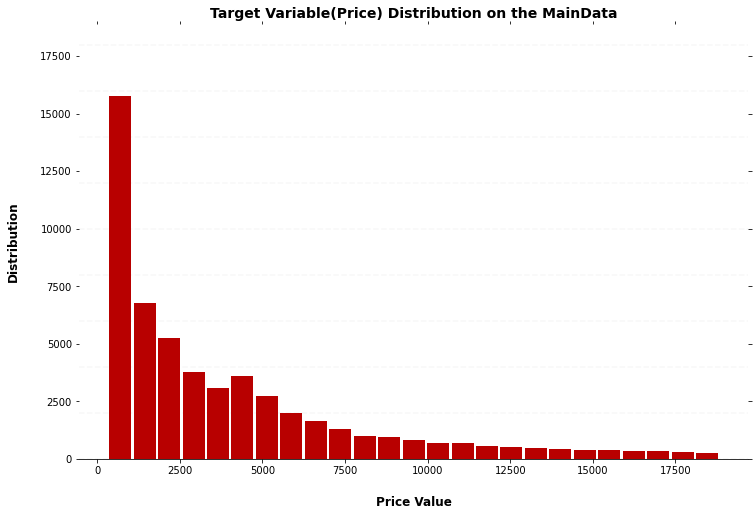

In [ ]:
#Distribution of Target Variable
ax = df.hist(column='price', bins=25, grid=False, figsize=(12,8), color='#B80000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Target Variable(Price) Distribution on the MainData", weight='bold', size=14)

    # Set x-axis label
    x.set_xlabel("Price Value", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Distribution", labelpad=20, weight='bold', size=12)


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

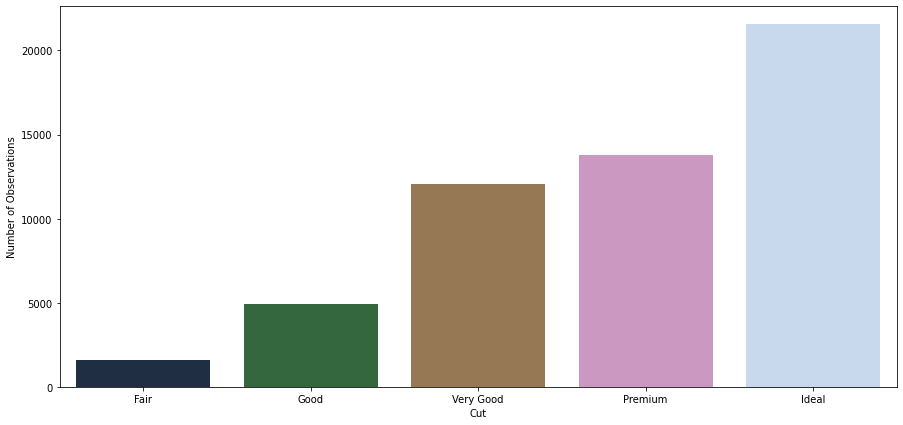

In [ ]:
plt.figure(figsize= (15, 7))
sns.countplot(x= "cut", data= df, palette= sns.color_palette("cubehelix", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Number of Observations")
plt.show()

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print('0 values:', 0 in df.values)
print(df.shape)
df.describe()

0 values: True
(53940, 10)


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.query('x==0 or y==0 or z==0')
df.drop(df.query('x==0 or y==0 or z==0').index, inplace=True)
#removed all the dimensions with 0/ since there quantities were very less

In [ ]:
print('0 values in dataset:', 0 in df.values)
print(df.shape)
df.describe()

0 values in dataset: False
(53920, 10)


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Checking out Max values in the dataset
df.query('x==10.740000 or z==31.800000 or y==58.900000')
# 3 values with max errors 

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


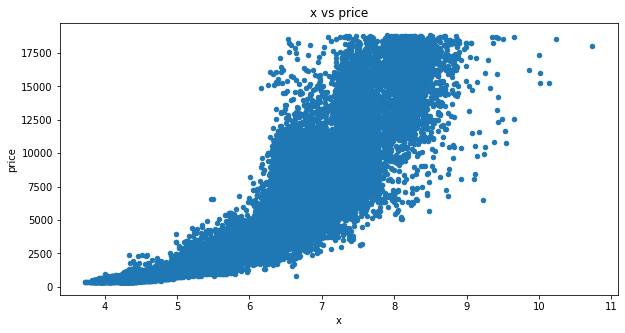

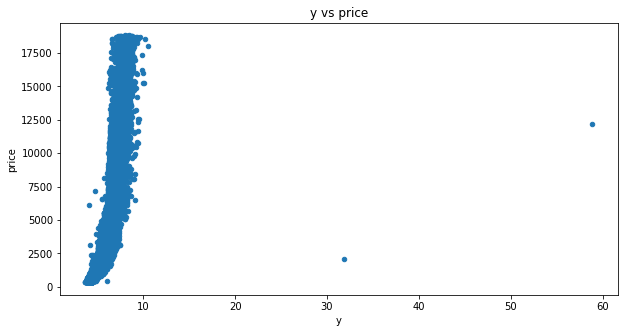

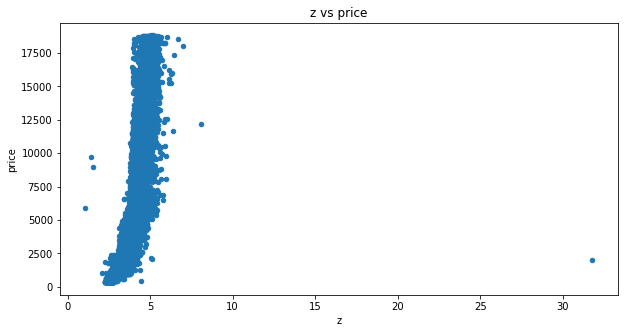

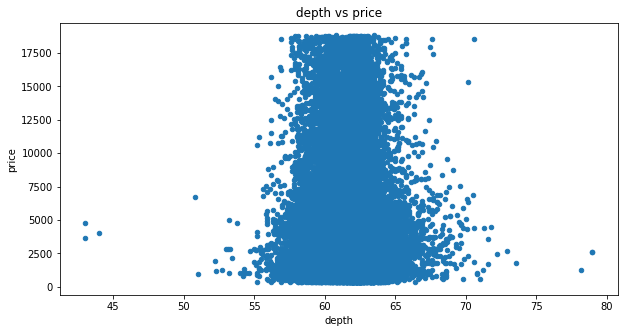

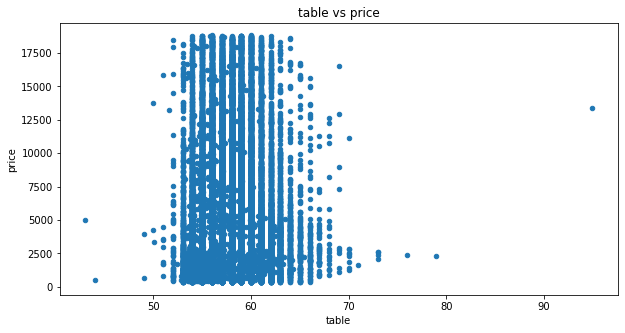

In [ ]:
num_variables = ['x','y','z','depth','table']
for scatterplot in num_variables:
    df.plot.scatter(x=scatterplot, y='price', figsize=(10,5), title=scatterplot + ' vs ' + 'price')

In [ ]:
df.drop(df.query('y>30 or z>15').index,inplace=True)
df.drop(df.query('depth>75 or depth<50').index, inplace=True)
df.drop(df.query('table<50 or table>80').index, inplace=True)

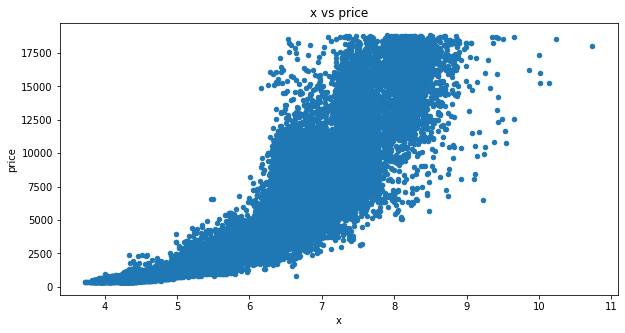

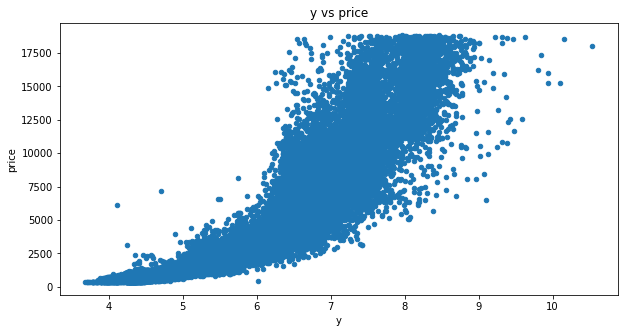

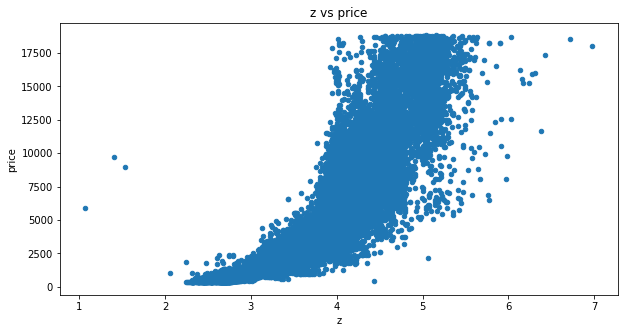

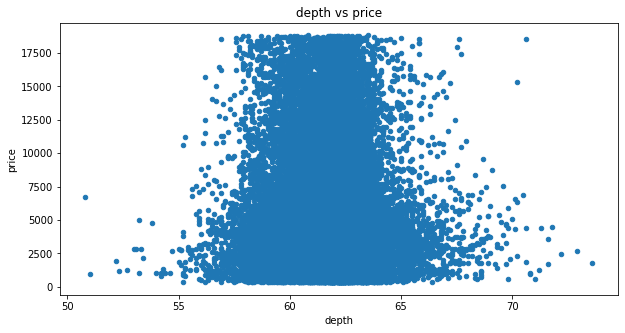

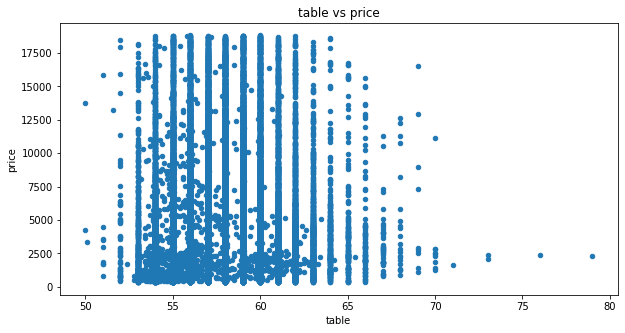

In [ ]:
num_variables = ['x','y','z','depth','table']
for scatterplot in num_variables:
    df.plot.scatter(x=scatterplot, y='price', figsize=(10,5), title=scatterplot + ' vs ' + 'price')

In [ ]:
#maindata_pairplot=sns.pairplot(maindata, hue= 'cut') #pairplot with respect to cut or categorical only 5 unique values
#pplot = sns.pairplot(df[['price','x','y','z','depth','table','carat']])


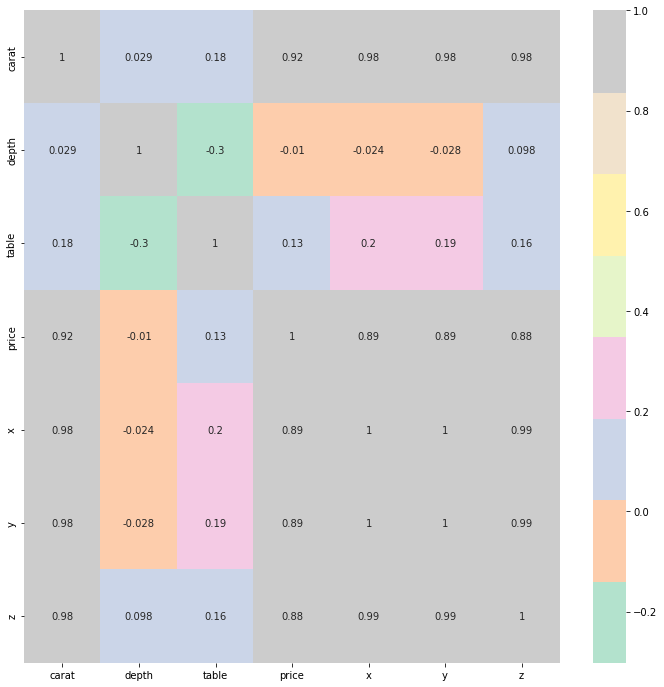

In [ ]:
correlationmatrix = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlationmatrix, cmap='Pastel2',annot=True)

#Pycaret

In [ ]:
pip install pycaret

In [ ]:
from pycaret.regression import *

In [ ]:
# s = setup(df, target = 'price')
# df = data.copy()
dpy = df.copy()

In [ ]:
s = setup(dpy, target = 'price',feature_selection= True)

,Description,Value
0,session_id,7145
1,Target,price
2,Original Data,"(53906, 10)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(37734, 23)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dummy', Dummify(target='price')),
                ('fix_perfect', Remove_100(target='price')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
          

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,292.1600,3.000006e+05,547.6253,0.9812,0.1118,0.0867,0.387
et,Extra Trees Regressor,282.3019,3.105854e+05,557.0966,0.9806,0.1054,0.0774,11.757
rf,Random Forest Regressor,283.5938,3.124074e+05,558.6206,0.9805,0.1026,0.0769,14.287
gbr,Gradient Boosting Regressor,406.9732,5.368116e+05,732.4217,0.9664,0.2180,0.1309,3.250
dt,Decision Tree Regressor,372.6500,5.708667e+05,755.0694,0.9643,0.1368,0.0971,0.236
knn,K Neighbors Regressor,563.6512,1.059820e+06,1028.6222,0.9337,0.2077,0.1629,0.800
lr,Linear Regression,733.6291,1.261444e+06,1122.7670,0.9211,0.5780,0.3858,0.365
ridge,Ridge Regression,734.0588,1.261343e+06,1122.7252,0.9211,0.5799,0.3860,0.032
br,Bayesian Ridge,733.6967,1.261426e+06,1122.7595,0.9211,0.5784,0.3859,0.061
lasso,Lasso Regression,732.5705,1.261708e+06,1122.9002,0.9210,0.5839,0.3820,0.122


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7145, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
type(best)
# print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7145, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5206, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

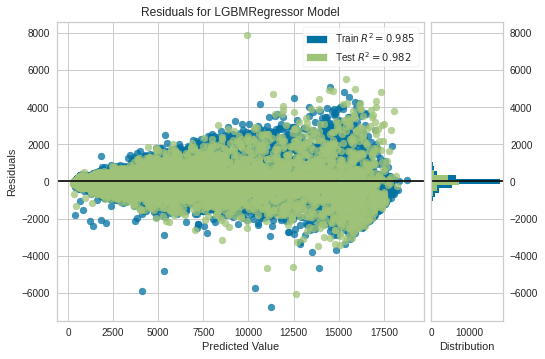

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'residuals')

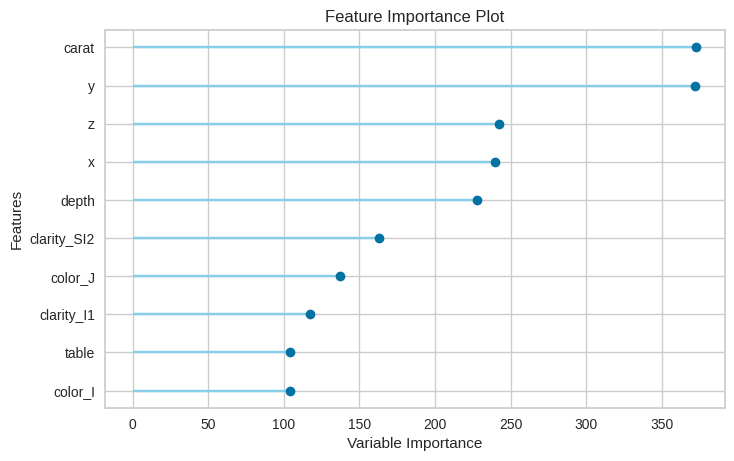

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4375, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,287.1893,289142.648,537.7199,0.9819,0.1102,0.0843


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Label
0,1.17,62.599998,55.0,6.75,6.70,4.21,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7731,5571.949767
1,0.51,61.200001,56.0,5.17,5.19,3.17,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2093,2119.739414
2,1.75,62.799999,59.0,7.62,7.53,4.76,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16220,15677.344092
3,2.07,58.900002,61.0,8.45,8.35,4.95,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13786,16158.058382
4,2.01,61.500000,60.0,8.09,8.01,4.95,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17003,15812.426953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16178,0.91,63.400002,56.0,6.18,6.12,3.90,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4224,4081.740267
16179,0.59,61.299999,58.0,5.41,5.45,3.33,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1748,1637.812086
16180,0.24,61.700001,60.0,3.97,4.00,2.46,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,430,518.738996
16181,1.53,60.799999,59.0,7.54,7.49,4.57,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8911,8505.325136


In [ ]:
predictions = predict_model(best, data=dpy)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4375, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,273.7497,249395.5962,499.3952,0.9843,0.1091,0.0834


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Label
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,558.527395
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,592.850499
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,401.609069
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,447.527955
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,333.892036


In [ ]:
save_model(best, 'my_best_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4375, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=my_best_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Unnamed: 0'],
                                      ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_fea

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Unnamed: 0'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, mi

In [ ]:
processed_X = preprocess_pipeline.fit_transform(df_X1, df_y)
y_df = df_y.values
df_processed_X = pd.DataFrame(processed_X, 
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)
df_processed_X.loc[null_rows_idx]

(43124, 26)


,num__carat,num__depth,num__table,num__x,num__y,num__z,cat__cut_1,cat__cut_2,cat__cut_3,cat__cut_4,...,cat__color_6,cat__color_7,cat__clarity_1,cat__clarity_2,cat__clarity_3,cat__clarity_4,cat__clarity_5,cat__clarity_6,cat__clarity_7,cat__clarity_8


# Machine Learning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53906 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53906 non-null  float64
 1   cut      53906 non-null  int64  
 2   color    53906 non-null  int64  
 3   clarity  53906 non-null  int64  
 4   depth    53906 non-null  float64
 5   table    53906 non-null  float64
 6   price    53906 non-null  int64  
 7   x        53906 non-null  float64
 8   y        53906 non-null  float64
 9   z        53906 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [ ]:
#Checking all Object DTypes
for iterator in df.select_dtypes('object').columns:
    print(df.iloc[:][iterator].value_counts(),'\n')

In [ ]:
# Assigning the Object Dtypes Datasets to numerics (Dummy Variables)
print('Variables of CUT',df.cut.unique())
print('Variables of COLOR',df.color.unique())
print('Variables of CLARITY',df.clarity.unique())

Variables of CUT [4 5 2 3 1]
Variables of COLOR [2 6 7 5 3 4 1]
Variables of CLARITY [1 2 4 3 5 6 8 7]


In [ ]:
df['cut'].replace({'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}, inplace=True)
df['color'].replace({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}, inplace=True)
df['clarity'].replace({'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7,'I1':8}, inplace=True)

#Apply Label Encoder to assign values to all the non numerical values under the categorical columns 

In [ ]:
df.head() #the values for the categorical variables are converted into numeric forms

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,2,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,2,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,6,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
co = df.corr()
co

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.019531,0.291305,-0.274766,0.029277,0.181806,0.921595,0.977779,0.976861,0.976525
cut,-0.019531,1.000000,0.007399,0.016113,-0.312678,-0.064702,0.028560,-0.005621,-0.015252,-0.048450
color,0.291305,0.007399,1.000000,0.041414,0.049025,0.027059,0.172374,0.270586,0.270392,0.274940
clarity,-0.274766,0.016113,0.041414,1.000000,-0.021700,-0.130770,-0.141758,-0.301070,-0.298568,-0.299989
depth,0.029277,-0.312678,0.049025,-0.021700,1.000000,-0.302091,-0.010275,-0.024393,-0.027532,0.097621
table,0.181806,-0.064702,0.027059,-0.130770,-0.302091,1.000000,0.127050,0.196330,0.190141,0.155838
price,0.921595,0.028560,0.172374,-0.141758,-0.010275,0.127050,1.000000,0.887223,0.888817,0.882170
x,0.977779,-0.005621,0.270586,-0.301070,-0.024393,0.196330,0.887223,1.000000,0.998657,0.991123
y,0.976861,-0.015252,0.270392,-0.298568,-0.027532,0.190141,0.888817,0.998657,1.000000,0.990781
z,0.976525,-0.048450,0.274940,-0.299989,0.097621,0.155838,0.882170,0.991123,0.990781,1.000000


In [ ]:
ds = df.copy()
ds['volume']=ds.x * ds.y * ds.z
ds['lenwidth']=ds.x / ds.y

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53906 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     53906 non-null  float64
 1   cut       53906 non-null  int64  
 2   color     53906 non-null  int64  
 3   clarity   53906 non-null  int64  
 4   depth     53906 non-null  float64
 5   table     53906 non-null  float64
 6   price     53906 non-null  int64  
 7   x         53906 non-null  float64
 8   y         53906 non-null  float64
 9   z         53906 non-null  float64
 10  volume    53906 non-null  float64
 11  lenwidth  53906 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 5.3 MB


In [ ]:
ds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,lenwidth
0,0.23,4,2,1,61.5,55.0,326,3.95,3.98,2.43,38.20203,0.992462


In [ ]:
#Checking all Object DTypes
for iterator in df.select_dtypes('object').columns:
    print(df.iloc[:][iterator].value_counts(),'\n')
else:
    print("No Object Dtypes available in the diamonds dataset")

No Object Dtypes available in the diamonds dataset


Splits 

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=df[Predictors].values
y=df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37734, 7)
(37734,)
(16172, 7)
(16172,)


In [ ]:
#IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_X1_num = df_X1.select_dtypes(include=[np.number])
imputer.fit(df_X1_num)
X = imputer.transform(df_X1_num)
df_X_num_iter = pd.DataFrame(X, columns=df_X1_num.columns, index=df_X1_num.index)
df_X_num_iter.loc[null_rows_idx]


NameError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) # returns a 
        # regular matrix that can be combined easily with the data we get from 
        # the numeric pipeline
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0))
    # The feature selector can use any predictive model; we chose LinearRegression here. 
    # Unfortunately, the sklearn version doesn't automatically pick the right number of features. 
    # But, if we ask it to pick k features, it'll pick best k features. We can specify k as an 
    # integer (number of columns) or, as a fraction of all the features. 
    # In the above code we specify it as a fraction by passing a floating point number: 1.0 means 
    # take all, no selection. We'll select the best k by cross validation in an outer loop.
    # By default, it does 'forward' search; we can change it by setting the direction argument to 'backward'. 
])

preprocess_pipeline

## Multi Linear Regression

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.8839164920695712

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1735          2204.0
1  15930         14207.0
2   4427          5176.0
3    756           155.0
4   8582          7878.0
Mean Accuracy on test data: 65.2511747842841
Median Accuracy on test data: 80.38037592626853

Accuracy values for 10-fold Cross Validation:
 [62.52587555 71.49748269 79.01897674 77.15789381 76.06515211 35.53057747
 41.83635512 50.25953976 63.2606363  69.08350544]

Final Average Accuracy of the model: 62.62


##Decision Trees

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.9811282012503569

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1735          1886.0
1  15930         14411.0
2   4427          4337.0
3    756           567.0
4   8582          9744.0
Mean Accuracy on test data: 90.54784749097767
Median Accuracy on test data: 92.69771003911498

Accuracy values for 10-fold Cross Validation:
 [81.32442665 85.24102554 84.1413162  81.324165   76.93833572 80.95658523
 83.05976067 80.95753781 80.15552574 80.8582009 ]

Final Average Accuracy of the model: 81.5


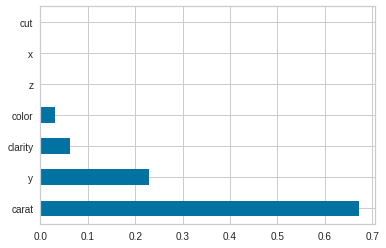

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=10,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##KNN K-Nearest Model

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')
R2 Value: 0.9858495048527526

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1735          1808.0
1  15930         14861.0
2   4427          4271.0
3    756           650.0
4   8582          8497.0
Mean Accuracy on test data: 92.14483186172184
Median Accuracy on test data: 94.6090333870536

Accuracy values for 10-fold Cross Validation:
 [83.9317766  86.96443763 86.42939946 83.93351345 81.4370537  82.68026889
 84.07774712 82.7700992  83.33287451 84.45034203]

Final Average Accuracy of the model: 84.0


In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

NameError: ignored

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=2000)
len(train_set), len(test_set)

(43124, 10782)

In [ ]:
df_X = train_set.drop("price", axis=1).copy()
df_y = train_set["price"].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) # returns a 
        # regular matrix that can be combined easily with the data we get from 
        # the numeric pipeline
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0))
    # The feature selector can use any predictive model; we chose LinearRegression here. 
    # Unfortunately, the sklearn version doesn't automatically pick the right number of features. 
    # But, if we ask it to pick k features, it'll pick best k features. We can specify k as an 
    # integer (number of columns) or, as a fraction of all the features. 
    # In the above code we specify it as a fraction by passing a floating point number: 1.0 means 
    # take all, no selection. We'll select the best k by cross validation in an outer loop.
    # By default, it does 'forward' search; we can change it by setting the direction argument to 'backward'. 
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])

In [ ]:
processed_X = preprocess_pipeline.fit_transform(df_X1, df_y)
y_df = df_y.values
df_processed_X = pd.DataFrame(processed_X, 
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)
df_processed_X.loc[null_rows_idx]

NameError: ignored

## Identifying Missing Values

In [ ]:
#Dataset have 20 values when at least one of the dimensions is equal to zero.
#These rows constitutes only 0.03% of the whoel dataset. Dropping them wouldn't
#have much effect in our analysis but we decided to impute those values
((df[zero_dimension].count()[0]/df.count()[0])*100).round(4)

## Splitting the data into Train and Test

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=2000)
len(train_set), len(test_set)

In [ ]:
df_X = train_set.drop("price", axis=1).copy()
df_y = train_set["price"].copy()

## Imputing the Missing Values

### Simple Imputer

In [ ]:
#Identifying the rows where at least one of the dimension is equal to 0
zero_dimension = ((df_X['x'] == 0) | (df_X['y'] == 0) | (df_X['z'] == 0))
df_X[zero_dimension]
#df_X[zero_dimension].count()[0]

,carat,cut,color,clarity,depth,table,x,y,z


In [ ]:
#Replacing 0 dimensions with NaN in order to be able to use the imputer strategies
df_X1 = df_X.copy()
df_X1['x'].replace(0, np.nan, inplace=True)
df_X1['y'].replace(0, np.nan, inplace=True)
df_X1['z'].replace(0, np.nan, inplace=True)

null_rows_idx = (df_X1['x'].isnull() | df_X1['y'].isnull() | df_X1['z'].isnull())
df_X1[null_rows_idx]

,carat,cut,color,clarity,depth,table,x,y,z


In [ ]:
#SimpleImputer(median)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df_X1_num = df_X1.select_dtypes(include=[np.number])
imputer.fit(df_X1_num)
X = imputer.transform(df_X1_num)
df_X_num_median = pd.DataFrame(X, columns=df_X1_num.columns, index=df_X1_num.index)

df_X_num_median.loc[null_rows_idx]

,carat,cut,color,clarity,depth,table,x,y,z


### Iterative Imputer

In [ ]:
#IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_X1_num = df_X1.select_dtypes(include=[np.number])
imputer.fit(df_X1_num)
X = imputer.transform(df_X1_num)
df_X_num_iter = pd.DataFrame(X, columns=df_X1_num.columns, index=df_X1_num.index)
df_X_num_iter.loc[null_rows_idx]


,carat,cut,color,clarity,depth,table,x,y,z


We can also see that row 49556 and 49557 are identical and both have null dimensions, we can drop one of them.

## Pipeline with Feature Selection

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) # returns a 
        # regular matrix that can be combined easily with the data we get from 
        # the numeric pipeline
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0))
    # The feature selector can use any predictive model; we chose LinearRegression here. 
    # Unfortunately, the sklearn version doesn't automatically pick the right number of features. 
    # But, if we ask it to pick k features, it'll pick best k features. We can specify k as an 
    # integer (number of columns) or, as a fraction of all the features. 
    # In the above code we specify it as a fraction by passing a floating point number: 1.0 means 
    # take all, no selection. We'll select the best k by cross validation in an outer loop.
    # By default, it does 'forward' search; we can change it by setting the direction argument to 'backward'. 
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])